In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['text.usetex'] = True

df = pd.read_csv("~/Dropbox/data_hdqi/gibbs_data_biggg.csv")
df["r"] = df["e"] / df["m"] # ratio
print(df)

         n      m  k   e   t         r
0     1000  10000  3  62  10  0.006200
1     1000  10000  3  62  11  0.006200
2     1000  10000  3  63  12  0.006300
3     1000  10000  3  63  13  0.006300
4     1000  10000  3  63  14  0.006300
...    ...    ... ..  ..  ..       ...
8995   800   8000  6  57   5  0.007125
8996   800   8000  6  59   6  0.007375
8997   800   8000  6  59   7  0.007375
8998   800   8000  6  59   8  0.007375
8999   800   8000  6  59   9  0.007375

[9000 rows x 6 columns]


In [3]:
# Group by (n, m, k) and aggregate
summary = (
    df.groupby(["n", "m", "k"])
      .agg(
          avg_r=("r", "mean"),
          std_r=("r", "std"),
          num_trials=("r", "count")
      )
      .reset_index()
)

summary['R'] = (summary['m'] / summary['n']).astype(int)


print(summary)

        n      m  k     avg_r     std_r  num_trials   R
0     200    600  3  0.034833  0.001179          50   3
1     200    600  4  0.036433  0.001011          50   3
2     200    600  5  0.033967  0.001059          50   3
3     200    600  6  0.030433  0.000999          50   3
4     200   1200  3  0.012150  0.000535          50   6
..    ...    ... ..       ...       ...         ...  ..
175  3000  18000  6  0.014618  0.000051          50   6
176  3000  30000  3  0.006474  0.000044          50  10
177  3000  30000  4  0.007867  0.000035          50  10
178  3000  30000  5  0.007981  0.000036          50  10
179  3000  30000  6  0.007712  0.000024          50  10

[180 rows x 7 columns]


3


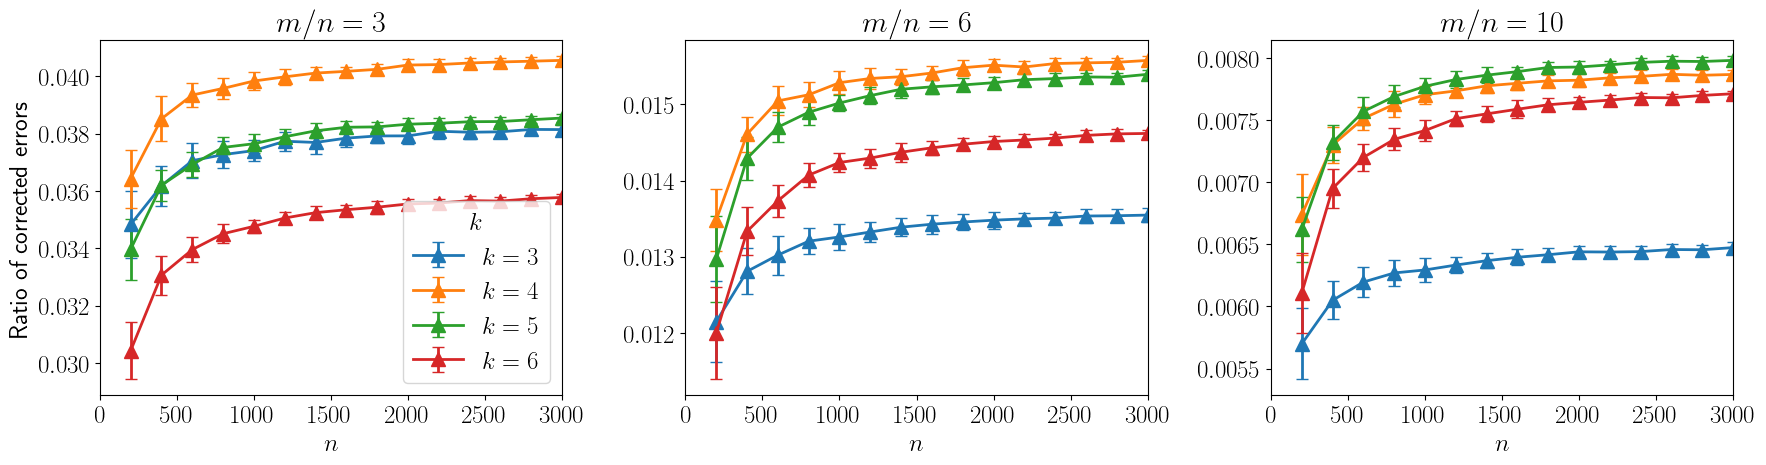

In [19]:
R_values = sorted(summary["R"].unique())
num_R = len(R_values)
print(num_R)

# Create subplots horizontally
fig, axes = plt.subplots(1, num_R, figsize=(6*num_R, 5), sharey=False)

# Color map for different k values
colors = plt.cm.tab10.colors  # up to 10 distinct colors

# Font size
plt.rc("font", size=18)

for idx, R_val in enumerate(R_values):
    ax = axes[idx]

    # Subset for this m
    df_R = summary[summary["R"] == R_val]

    # One curve for each k
    for j, k_val in enumerate(sorted(df_R["k"].unique())):
        df_Rk = df_R[df_R["k"] == k_val].sort_values("n")

        ax.errorbar(
            df_Rk["n"], df_Rk["avg_r"],
            yerr=df_Rk["std_r"],
            fmt='-^',  # line with triangle markers
            markersize=10,
            linewidth=2,
            capsize=4,
            color=colors[j % len(colors)],
            label=fr"$k = {k_val}$" if idx == 0 else None  # legend only on right-most plot
        )

    ax.set_title(fr"$m/n = {R_val}$")
    ax.set_xlabel(r"$n$")
    if idx == 0:
        ax.set_ylabel("Ratio of corrected errors")

    # Explicit x-axis setup
    ax.set_xlim(0, 3000)
    ax.set_xticks(np.arange(0, 3001, 500))

# Legend only on right-most plot
axes[0].legend(title=r"$k$")

plt.tight_layout()
plt.show()

In [25]:
# Get results about the semicircle law
semicircle_law = lambda r: (np.sqrt(r) + np.sqrt(1-r))**2 / 2

# --- Step 1: Apply f(e, m) row by row ---
df["semicircle"] = df.apply(lambda row: semicircle_law(row["r"]), axis=1)

# --- Step 2: Group by (n, m, k) and compute mean/std of semicircle ---
semicircle_summary = (
    df.groupby(["n", "m", "k"])
      .agg(
          avg_semi=("semicircle", "mean"),
          std_semi=("semicircle", "std"),
          num_trials=("semicircle", "count")
      )
      .reset_index()
)

# --- Step 3: (optional) print counts like before ---
semi3000 = semicircle_summary[semicircle_summary["n"] == 3000]
semi3000['R'] = semi3000['m'] // semi3000['n']
print(semi3000)

        n      m  k  avg_semi  std_semi  num_trials   R
168  3000   9000  3  0.691534  0.000425          50   3
169  3000   9000  4  0.697253  0.000360          50   3
170  3000   9000  5  0.692501  0.000326          50   3
171  3000   9000  6  0.685724  0.000307          50   3
172  3000  18000  3  0.615599  0.000364          50   6
173  3000  18000  4  0.623826  0.000231          50   6
174  3000  18000  5  0.623111  0.000241          50   6
175  3000  18000  6  0.620017  0.000206          50   6
176  3000  30000  3  0.580200  0.000269          50  10
177  3000  30000  4  0.588348  0.000193          50  10
178  3000  30000  5  0.588977  0.000197          50  10
179  3000  30000  6  0.587479  0.000135          50  10


/var/folders/h_/l1wrzqpn7g953jxhww7ln1wc0000gq/T/ipykernel_15201/979177984.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi3000['R'] = semi3000['m'] // semi3000['n']


In [ ]:
semi3000['avg_semi'] *= 100
semi3000['std_semi'] *= 100

/var/folders/h_/l1wrzqpn7g953jxhww7ln1wc0000gq/T/ipykernel_15201/2414359207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi3000['avg_semi'] *= 100
/var/folders/h_/l1wrzqpn7g953jxhww7ln1wc0000gq/T/ipykernel_15201/2414359207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi3000['std_semi'] *= 100


In [29]:
semi3000['avg_semi'] = round(semi3000['avg_semi'], 2)
semi3000['std_semi'] = round(semi3000['std_semi'], 2)
print(semi3000)

        n      m  k  avg_semi  std_semi  num_trials   R
168  3000   9000  3     69.15      0.04          50   3
169  3000   9000  4     69.73      0.04          50   3
170  3000   9000  5     69.25      0.03          50   3
171  3000   9000  6     68.57      0.03          50   3
172  3000  18000  3     61.56      0.04          50   6
173  3000  18000  4     62.38      0.02          50   6
174  3000  18000  5     62.31      0.02          50   6
175  3000  18000  6     62.00      0.02          50   6
176  3000  30000  3     58.02      0.03          50  10
177  3000  30000  4     58.83      0.02          50  10
178  3000  30000  5     58.90      0.02          50  10
179  3000  30000  6     58.75      0.01          50  10


/var/folders/h_/l1wrzqpn7g953jxhww7ln1wc0000gq/T/ipykernel_15201/3174854416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi3000['avg_semi'] = round(semi3000['avg_semi'], 2)
/var/folders/h_/l1wrzqpn7g953jxhww7ln1wc0000gq/T/ipykernel_15201/3174854416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semi3000['std_semi'] = round(semi3000['std_semi'], 2)
